# 라벨인코딩 하기
# 앙상블 사용하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:\\workspace\\CaloryPJ\\train.csv')
test = pd.read_csv('C:\\workspace\\CaloryPJ\\test.csv')

In [3]:
#  train.csv [파일]
# 7500개의 데이터
# ID : 샘플 별 고유 id
# Exercise_Duration  : 운동 시간(분)
# Body_Temperature(F) : 체온
# BPM : 심박수
# Height(Feet) : 키(피트)
# Height(Remainder_Inches) : 키(피트 계산 후 더해야 할 키)
# Weight(lb) : 몸무게(파운드)
# Weight_Status : 체중 상태
# Gender : 성별
# Age : 나이
# Calories_Burned : 칼로리 소모량(목표 예측값)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [5]:
train.isna().sum() #결측치 없음

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [6]:
train.drop(['ID','Weight_Status','Height(Feet)'], axis=1, inplace=True) # 고유Id, 체중상태 칼럼 삭제

In [7]:
train.describe() #기술통계량 확인코드

,Exercise_Duration,Body_Temperature(F),BPM,Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,12.000000,291.000000,79.000000,300.000000


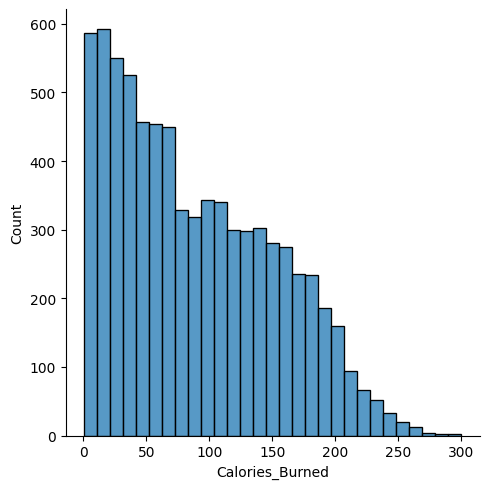

In [8]:
# VIsualization 시각화
# 데이터에 대한 이해를 위해 시각화 수행
# 종속변수 시각화 
# 종속변수에 대한 분포를 확인하기 위해 Calories_Burned 데이터 시각화
sns.displot(train['Calories_Burned']);

C:\Users\Playdata\AppData\Local\Temp\ipykernel_944\2998984512.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap = 'Blues');


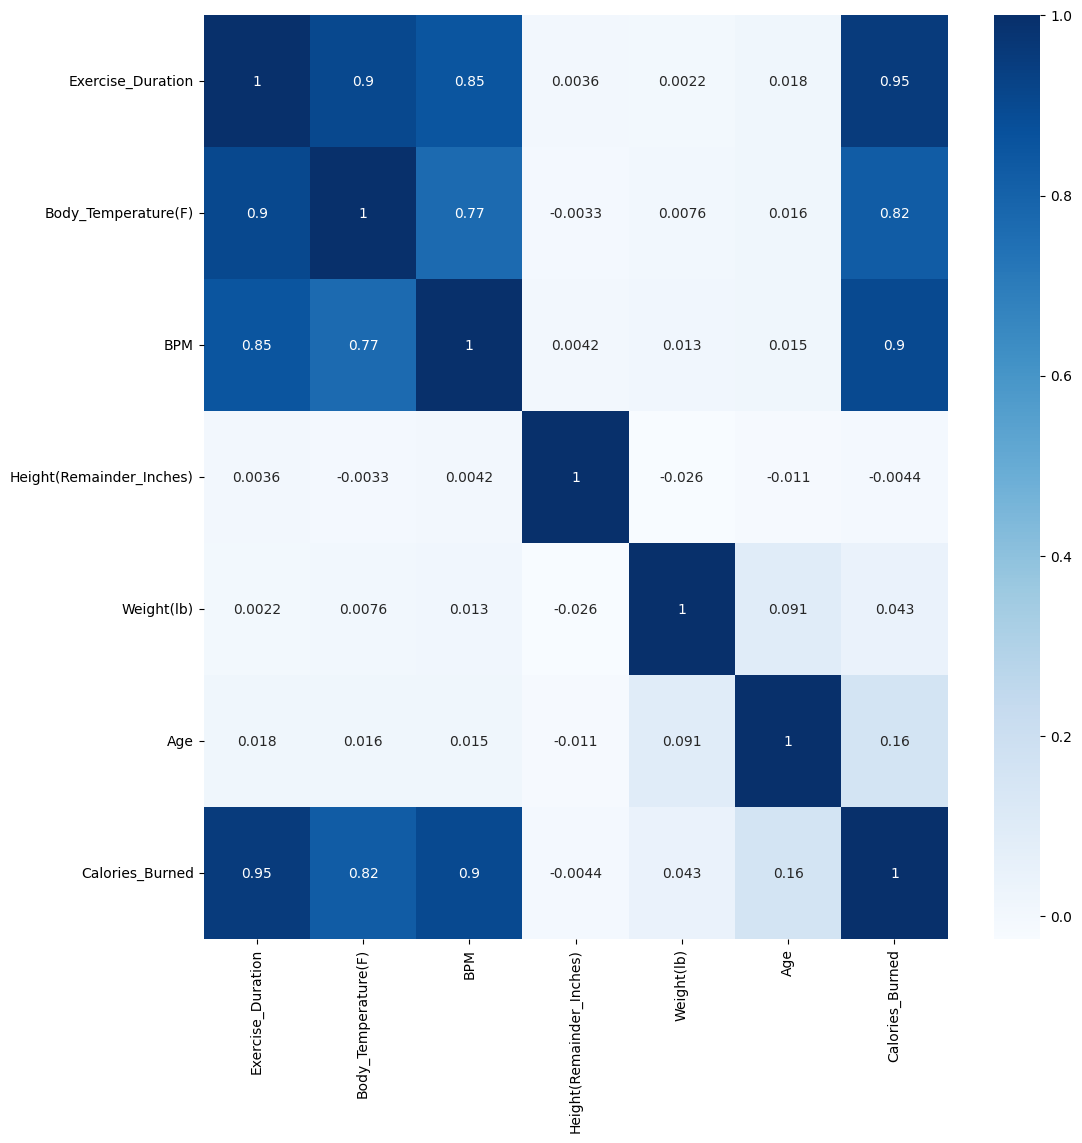

In [9]:
# 상관관계 확인
# feature간의 상관관계를 확인함으로써 종속변수와 연관된 변수, 다중공선성이 일어날 변수 등을 확인
# 히트맵으로 상관관계 표시
# 키, 몸무게 상관관계 높음
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot = True, cmap = 'Blues');

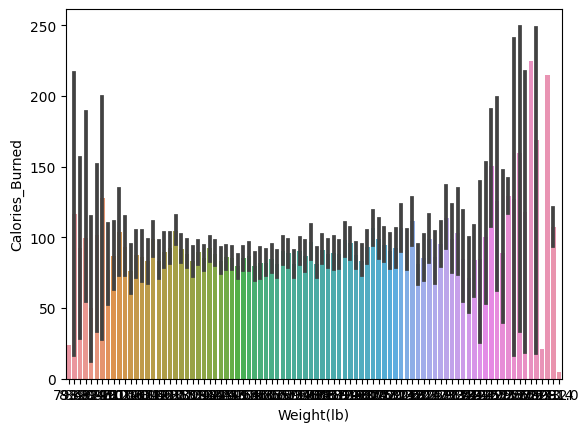

In [10]:
# 몸무게 별 평균 소모 칼로리 시각화
# barplot은 기본적으로 각 데이터의 평균을 보여준다.
# 막대그래프 위에 덧그려진 검은 선은 95%의 신뢰구간을 나타낸다.
sns.barplot(x=train['Weight(lb)'], y = train['Calories_Burned']);

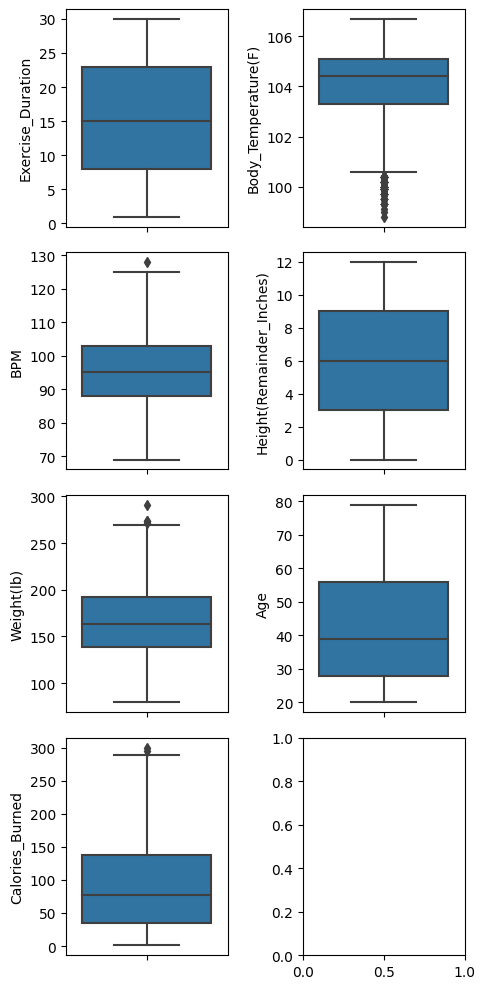

In [11]:
# 이상치 확인
# 데이터 내부에는 평균적인 관측치와 멀리 떨어진 이상치가 존재하는 경우도 있다.
# boxplot을 사용하여 이상치를 확인할 수 있다.
# fig, figure=그래프가 담기게 되는 프레임
# ax, axes=그래프가 그려지는 캔버스

fig, axes = plt.subplots(4,2, figsize = (5,10))

sns.boxplot(y = train['Exercise_Duration'], ax = axes[0][0])
sns.boxplot(y = train['Body_Temperature(F)'], ax = axes[0][1])

sns.boxplot(y = train['BPM'], ax = axes[1][0])
sns.boxplot(y = train['Height(Remainder_Inches)'], ax = axes[1][1])

sns.boxplot(y = train['Weight(lb)'], ax = axes[2][0])
sns.boxplot(y = train['Age'], ax = axes[2][1])

sns.boxplot(y = train['Calories_Burned'], ax = axes[3][0])

plt.tight_layout()


In [12]:
# 결측치 없음
# 중복제거
train.drop_duplicates(inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7499 non-null   float64
 1   Body_Temperature(F)       7499 non-null   float64
 2   BPM                       7499 non-null   float64
 3   Height(Remainder_Inches)  7499 non-null   float64
 4   Weight(lb)                7499 non-null   float64
 5   Gender                    7499 non-null   object 
 6   Age                       7499 non-null   int64  
 7   Calories_Burned           7499 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 527.3+ KB


In [14]:
train.isna().sum()

Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Remainder_Inches)    0
Weight(lb)                  0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7499 non-null   float64
 1   Body_Temperature(F)       7499 non-null   float64
 2   BPM                       7499 non-null   float64
 3   Height(Remainder_Inches)  7499 non-null   float64
 4   Weight(lb)                7499 non-null   float64
 5   Gender                    7499 non-null   object 
 6   Age                       7499 non-null   int64  
 7   Calories_Burned           7499 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 527.3+ KB


In [16]:
# 이상치 제거 함수
def outlier_remove(df, columns):
  q1 = df[columns].quantile(0.25)
  q3 = df[columns].quantile(0.75)
  iqr= q3-q1

  boundary=1.5*iqr

  index1 = df[df[columns] > q3+boundary].index
  index2 = df[df[columns] < q1-boundary].index

  df[columns]=df[columns].drop(index1)
  df[columns]=df[columns].drop(index2)

  return df


In [17]:
outlier_remove(train,'Body_Temperature(F)')

,Exercise_Duration,Body_Temperature(F),BPM,Height(Remainder_Inches),Weight(lb),Gender,Age,Calories_Burned
0,26.0,105.6,107.0,9.0,154.3,F,45,166.0
1,7.0,103.3,88.0,6.0,224.9,M,50,33.0
2,7.0,103.3,86.0,3.0,218.3,M,29,23.0
3,17.0,104.0,99.0,6.0,147.7,F,33,91.0
4,9.0,102.7,88.0,10.0,169.8,M,38,32.0
...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,10.0,112.4,F,75,151.0
7496,20.0,105.3,104.0,8.0,147.7,F,21,114.0
7497,8.0,103.1,90.0,2.0,202.8,M,57,41.0
7498,12.0,104.4,97.0,9.0,167.6,M,35,57.0


In [18]:
outlier_remove(train,'BPM')

,Exercise_Duration,Body_Temperature(F),BPM,Height(Remainder_Inches),Weight(lb),Gender,Age,Calories_Burned
0,26.0,105.6,107.0,9.0,154.3,F,45,166.0
1,7.0,103.3,88.0,6.0,224.9,M,50,33.0
2,7.0,103.3,86.0,3.0,218.3,M,29,23.0
3,17.0,104.0,99.0,6.0,147.7,F,33,91.0
4,9.0,102.7,88.0,10.0,169.8,M,38,32.0
...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,10.0,112.4,F,75,151.0
7496,20.0,105.3,104.0,8.0,147.7,F,21,114.0
7497,8.0,103.1,90.0,2.0,202.8,M,57,41.0
7498,12.0,104.4,97.0,9.0,167.6,M,35,57.0


In [19]:
outlier_remove(train,'Weight(lb)')

,Exercise_Duration,Body_Temperature(F),BPM,Height(Remainder_Inches),Weight(lb),Gender,Age,Calories_Burned
0,26.0,105.6,107.0,9.0,154.3,F,45,166.0
1,7.0,103.3,88.0,6.0,224.9,M,50,33.0
2,7.0,103.3,86.0,3.0,218.3,M,29,23.0
3,17.0,104.0,99.0,6.0,147.7,F,33,91.0
4,9.0,102.7,88.0,10.0,169.8,M,38,32.0
...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,10.0,112.4,F,75,151.0
7496,20.0,105.3,104.0,8.0,147.7,F,21,114.0
7497,8.0,103.1,90.0,2.0,202.8,M,57,41.0
7498,12.0,104.4,97.0,9.0,167.6,M,35,57.0


In [20]:
outlier_remove(train,'Calories_Burned')

,Exercise_Duration,Body_Temperature(F),BPM,Height(Remainder_Inches),Weight(lb),Gender,Age,Calories_Burned
0,26.0,105.6,107.0,9.0,154.3,F,45,166.0
1,7.0,103.3,88.0,6.0,224.9,M,50,33.0
2,7.0,103.3,86.0,3.0,218.3,M,29,23.0
3,17.0,104.0,99.0,6.0,147.7,F,33,91.0
4,9.0,102.7,88.0,10.0,169.8,M,38,32.0
...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,10.0,112.4,F,75,151.0
7496,20.0,105.3,104.0,8.0,147.7,F,21,114.0
7497,8.0,103.1,90.0,2.0,202.8,M,57,41.0
7498,12.0,104.4,97.0,9.0,167.6,M,35,57.0


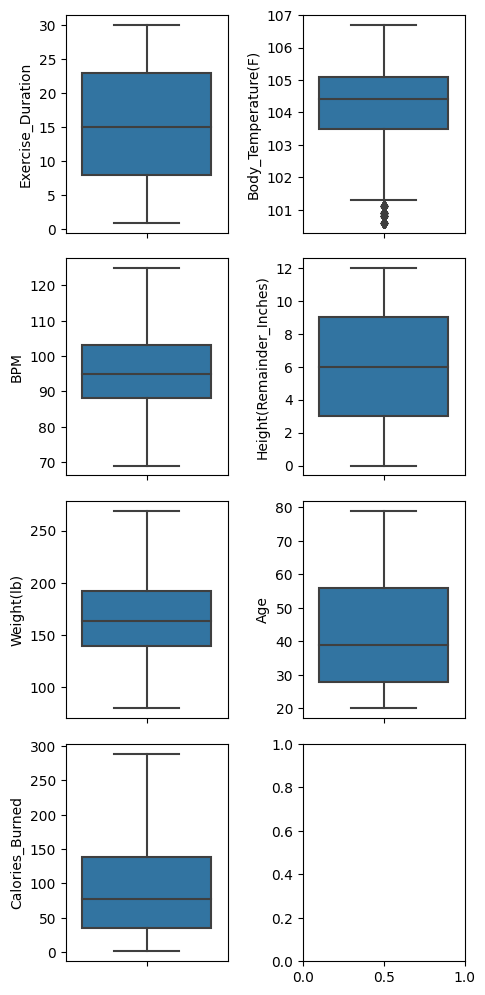

In [21]:
# 이상치 제거 여부 확인

fig, axes = plt.subplots(4,2, figsize = (5,10))

sns.boxplot(y = train['Exercise_Duration'], ax = axes[0][0])
sns.boxplot(y = train['Body_Temperature(F)'], ax = axes[0][1])

sns.boxplot(y = train['BPM'], ax = axes[1][0])
sns.boxplot(y = train['Height(Remainder_Inches)'], ax = axes[1][1])

sns.boxplot(y = train['Weight(lb)'], ax = axes[2][0])
sns.boxplot(y = train['Age'], ax = axes[2][1])

sns.boxplot(y = train['Calories_Burned'], ax = axes[3][0])

plt.tight_layout()


In [22]:
outlier_remove(train,'Body_Temperature(F)')

,Exercise_Duration,Body_Temperature(F),BPM,Height(Remainder_Inches),Weight(lb),Gender,Age,Calories_Burned
0,26.0,105.6,107.0,9.0,154.3,F,45,166.0
1,7.0,103.3,88.0,6.0,224.9,M,50,33.0
2,7.0,103.3,86.0,3.0,218.3,M,29,23.0
3,17.0,104.0,99.0,6.0,147.7,F,33,91.0
4,9.0,102.7,88.0,10.0,169.8,M,38,32.0
...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,10.0,112.4,F,75,151.0
7496,20.0,105.3,104.0,8.0,147.7,F,21,114.0
7497,8.0,103.1,90.0,2.0,202.8,M,57,41.0
7498,12.0,104.4,97.0,9.0,167.6,M,35,57.0


<Axes: ylabel='Body_Temperature(F)'>

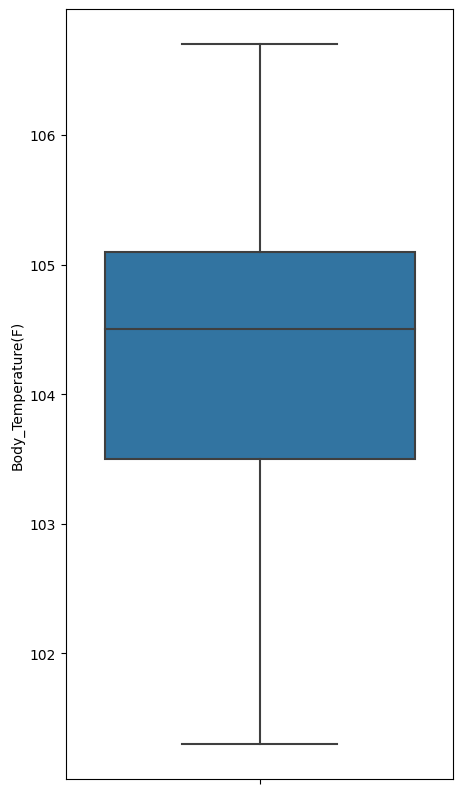

In [23]:
fig, axes = plt.subplots(figsize = (5,10))

sns.boxplot(y = train['Body_Temperature(F)'])

In [24]:
# 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환
# 하지만 일괄적으로 숫자 값으류 변환이 되면서 몇몇 ML알고리즘에는
# 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있고 숫자로 되어 있어
# 잘못하면 가중치로 인식하여 값에 왜곡이 생기게 된다.
# 이러한 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML알고리즘에는 적용하지 않는다.
# 트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별 문제가 없다.
# One=Hot Encoding
# from sklearn.preprocessing import OneHotEncoder
# import numpy as np
# items = ['M','F']

# # 1 : 모든 문자를 숫자형으로 변환
# encoder = LabelEncoder()
# encoder.fit(items)
# labels = encoder.transform(items)

# # 2: 2차원 데이터로 변환
# labels = labels.reshape(-1,1)

# # 3: One-Hot Encoding 적용
# oh_encoder = OneHotEncoder()
# oh_encoder.fit(labels)
# oh_labels = oh_encoder.transform(labels)

# oh_labels.toarray()
# oh_labels.shape

# get_dummies()를 사용해서 간단하게 원-핫 인코딩을 쉽게 진행
import pandas as pd

dummi_datas = pd.get_dummies(train, columns=['Gender']) #성별을 one-hot으로 변경

dummi_datas

,Exercise_Duration,Body_Temperature(F),BPM,Height(Remainder_Inches),Weight(lb),Age,Calories_Burned,Gender_F,Gender_M
0,26.0,105.6,107.0,9.0,154.3,45,166.0,1,0
1,7.0,103.3,88.0,6.0,224.9,50,33.0,0,1
2,7.0,103.3,86.0,3.0,218.3,29,23.0,0,1
3,17.0,104.0,99.0,6.0,147.7,33,91.0,1,0
4,9.0,102.7,88.0,10.0,169.8,38,32.0,0,1
...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,10.0,112.4,75,151.0,1,0
7496,20.0,105.3,104.0,8.0,147.7,21,114.0,1,0
7497,8.0,103.1,90.0,2.0,202.8,57,41.0,0,1
7498,12.0,104.4,97.0,9.0,167.6,35,57.0,0,1


In [25]:
dummi_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7499 non-null   float64
 1   Body_Temperature(F)       7100 non-null   float64
 2   BPM                       7498 non-null   float64
 3   Height(Remainder_Inches)  7499 non-null   float64
 4   Weight(lb)                7495 non-null   float64
 5   Age                       7499 non-null   int64  
 6   Calories_Burned           7497 non-null   float64
 7   Gender_F                  7499 non-null   uint8  
 8   Gender_M                  7499 non-null   uint8  
dtypes: float64(6), int64(1), uint8(2)
memory usage: 741.4 KB


In [26]:
# object인 컬럼 (Weight(ld)) 지우기 완료
# obgect인 컬럼(Gender) 지우기(딱히 상관관계가 안보여서?)  -> 완료
# Height값 하나 지우기-> 완료
# Age (int->float)변경
# 이상치 제거하기 -> 일단 완료

In [27]:
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [28]:
# Fixed RandomSeed / 랜덤시드 고정
# 매번 고정된 결과를 얻기 위해서 사용 

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) #Seed 고정

In [29]:
# # Feature&Target Split / 독립변수 , 종속 변수로 나누기
# # 모델을 학습시키기 위해서 독립변수(x)와 종속변수(y)로 나누어야 함
# # 단, 분석에 활용될 수 없는 ID 데이터는 제거
# # 독립변수로 설정할 train_x에서는 종속변수를 제거합니다. 
# # 또한, 분석에 활용하지 않는 ID데이터를 제거
# train_x = train.drop(['Calories_Burned'], axis=1)
# # trian_y 변수를 종속변수로 사용하기 위해 Calories_Burned 데이터를 지정
# train_y = train['Calories_Burned']

# # train_x 데이터와 마찬가지로 분석에 활용하지 않는 ID 데이터를 제거
# test_x = test.drop('ID',axis = 1)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler

In [31]:
# 전처리

In [32]:
# 회귀 모델 정의
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

In [40]:
dummi_datas.isna().sum()

Exercise_Duration             0
Body_Temperature(F)         399
BPM                           1
Height(Remainder_Inches)      0
Weight(lb)                    4
Age                           0
Calories_Burned               2
Gender_F                      0
Gender_M                      0
dtype: int64

In [41]:
dummi_datas.dropna(inplace=True)

In [42]:
dummi_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7094 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7094 non-null   float64
 1   Body_Temperature(F)       7094 non-null   float64
 2   BPM                       7094 non-null   float64
 3   Height(Remainder_Inches)  7094 non-null   float64
 4   Weight(lb)                7094 non-null   float64
 5   Age                       7094 non-null   int64  
 6   Calories_Burned           7094 non-null   float64
 7   Gender_F                  7094 non-null   uint8  
 8   Gender_M                  7094 non-null   uint8  
dtypes: float64(6), int64(1), uint8(2)
memory usage: 457.2 KB


In [43]:
dummi_datas.isna().sum()

Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Remainder_Inches)    0
Weight(lb)                  0
Age                         0
Calories_Burned             0
Gender_F                    0
Gender_M                    0
dtype: int64

In [44]:
y = dummi_datas.pop('Calories_Burned')
X = dummi_datas

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
# 모델 학습
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
# 추론
preds = dt_model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.988396056749976

In [53]:
dummi_datas.columns, len(dummi_datas.columns)

(Index(['Exercise_Duration', 'Body_Temperature(F)', 'BPM',
        'Height(Remainder_Inches)', 'Weight(lb)', 'Age', 'Gender_F',
        'Gender_M'],
       dtype='object'),
 8)

In [54]:
dt_model.feature_importances_, dt_model.feature_importances_.shape

(array([9.05050495e-01, 6.15872629e-04, 5.45334054e-02, 5.91736746e-04,
        3.41133955e-03, 2.76945569e-02, 6.62512289e-03, 1.47747123e-03]),
 (8,))

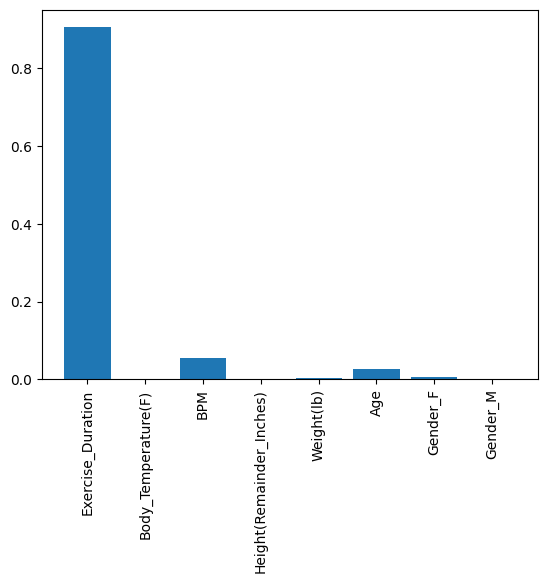

In [56]:
import matplotlib.pyplot as plt
plt.bar(dummi_datas.columns, dt_model.feature_importances_)
plt.xticks(rotation=90);

In [57]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [58]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
pred = rf_model.predict(X_train)

In [60]:
r2_score(y_test, preds)

0.988396056749976

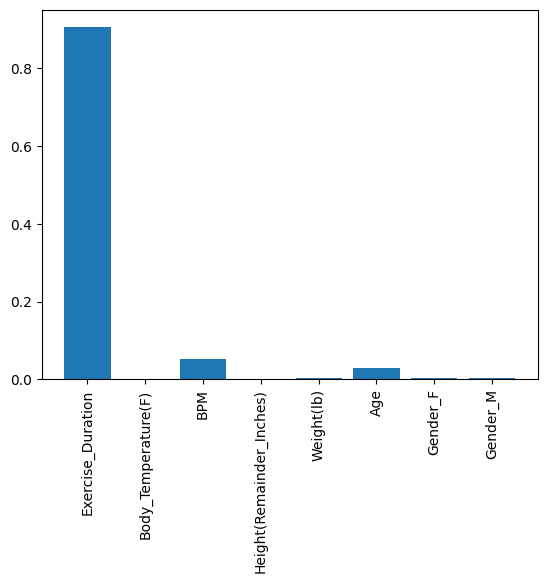

In [61]:
plt.bar(dummi_datas.columns, rf_model.feature_importances_)
plt.xticks(rotation=90);

In [ ]:
# 독립변수가 단항식이 아닌 2차,3차로 표현되는 것을 다항회귀라고 한다.


In [ ]:
test.drop(['ID','Weight_Status','Gender','Height(Feet)'], axis=1, inplace=True)

In [ ]:
pred_test = rf_model.predict(test)

In [ ]:
# submit/ 제출
submission = pd.read_csv('/content/drive/MyDrive/git project/open/open/sample_submission.csv')

In [ ]:
submission['Calories_Burned'] = pred_test

In [ ]:
submission.to_csv('./submission.csv', index =  False)